In [32]:
import numpy as np
import pandas as pd
import os
import glob
import codecs
import scispacy
import spacy
import sklearn
import warnings 

from collections import defaultdict, Counter
from sklearn.model_selection import KFold
# from negspacy.negation import Negex
from sklearn.svm import SVC, LinearSVC, NuSVC
from collections import defaultdict
from transformers import BertTokenizer
from nltk.corpus import stopwords

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#tokenizer
warnings.filterwarnings(action = 'ignore') 
import string  

punct = set(string.punctuation)
nlp = spacy.load("en_core_sci_sm")
med7 = spacy.load("en_core_med7_lg")


def tokenize_doc(text):
    bow = defaultdict(float)
    temp = []
    doc = nlp(text)
    doc = doc.ents
    lowered_tokens = map(lambda t: str(t).lower(), doc)

    for token in lowered_tokens:
        temp.append(token) 
    return temp

def tokenize_doc2(text):
    t = BertTokenizer.from_pretrained("bert-large-uncased-vocab.txt", lowercase=True)
    warnings.filterwarnings('ignore')
    output = t.tokenize(text)
    temp = []
    words = [w for w in output if w not in punct]
    for token in words:
        temp.append(token)
    return temp

def tokenize_doc3(text):
    # create distinct colours for labels
    col_dict = {}
    seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
    for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
        col_dict[label] = colour

    options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}
    doc = med7(text)

    return  [(ent.text.lower(), ent.label_) for ent in doc.ents]
    

In [4]:
med7 = spacy.load("en_core_med7_lg")

# create distinct colours for labels
col_dict = {}
seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

text = 'A patient was prescribed Magnesium hydroxide 400mg/5ml suspension PO of total 30ml bid for the next 5 days.'
doc = med7(text)

print(type(doc))
# spacy.displacy.render(doc, style='ent', jupyter=True, options=options)
# [(ent.text, ent.label_) for ent in doc.ents]

<class 'spacy.tokens.doc.Doc'>


In [5]:
def tok(text):
    # create distinct colours for labels
    col_dict = {}
    seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
    for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
        col_dict[label] = colour

    options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}

    
    doc = med7(text)

#     spacy.displacy.render(doc, style='ent', jupyter=True, options=options)

    return  [(ent.text.lower(), ent.label_) for ent in doc.ents]
        
tok(text)




[('magnesium hydroxide', 'DRUG'),
 ('400mg/5ml', 'DOSAGE'),
 ('suspension', 'FORM'),
 ('po', 'ROUTE'),
 ('30ml', 'DOSAGE'),
 ('bid', 'FREQUENCY'),
 ('for the next 5 days', 'DURATION')]

In [6]:
#original dataset:
data = pd.read_csv("mtsamples.csv")
ids = data["transcription"]
data = data.drop_duplicates(subset = ["description","medical_specialty","sample_name","transcription"])
temp = [i for i in data.index if pd.isna(data["transcription"][i])]
data = data.reset_index(drop=True)
surgery = list(data[data["medical_specialty"] == ' Surgery'].index.values)
consult = list(data[data["medical_specialty"] == ' Consult - History and Phy.'].index.values)
cardiovascular = list(data[data["medical_specialty"] == ' Cardiovascular / Pulmonary'].index.values)
orthopedic = list(data[data["medical_specialty"] == ' Orthopedic'].index.values)
radiology = list(data[data["medical_specialty"] == ' Radiology'].index.values)

general = list(data[data["medical_specialty"] == ' General Medicine'].index.values)
gastroenterology = list(data[data["medical_specialty"] == ' Gastroenterology'].index.values)
neurology = list(data[data["medical_specialty"] == ' Neurology'].index.values)
soap = list(data[data["medical_specialty"] == ' SOAP / Chart / Progress Notes'].index.values)
obstetrics = list(data[data["medical_specialty"] == ' Obstetrics / Gynecology'].index.values)

urology = list(data[data["medical_specialty"] == ' Urology'].index.values)
discharge = list(data[data["medical_specialty"] == ' Discharge Summary'].index.values)
ent = list(data[data["medical_specialty"] == ' ENT - Otolaryngology'].index.values)
neurosurgery = list(data[data["medical_specialty"] == ' Neurosurgery'].index.values)
hematology = list(data[data["medical_specialty"] == ' Hematology - Oncology'].index.values)

ophthalmology = list(data[data["medical_specialty"] == ' Ophthalmology'].index.values)
Nephrology = list(data[data["medical_specialty"] == ' Nephrology'].index.values)


uniq_dict = {}

temp_list = surgery[76:] + consult[76:] + cardiovascular[76:] + orthopedic[76:] + radiology[76:] + general[76:] + gastroenterology[76:] + neurology[76:] + soap[76:] + obstetrics[76:] + urology[76:] + discharge[76:] + ent[76:] + neurosurgery[76:] + hematology[76:] + ophthalmology[76:] + Nephrology[76:]

In [21]:
# Processed datasets:

# train_data_temp = pd.read_csv("list.csv")
# temp = [i for i in train_data_temp.index if pd.isna(train_data_temp["transcription"][i])]
# train_data_temp = train_data_temp.drop(temp)

data_b = pd.read_csv("mtsamples_b3.csv") # brian 3
data_p = pd.read_csv("mtsamples_p.csv")
data_t = pd.read_csv("mtsamples_t2.csv") # thai 2
data_j1 = pd.read_csv("mtsamples_j1.csv")
data_j2 = pd.read_csv("mtsamples_j2.csv")
data_j12 = pd.read_csv("mtsamples_j12.csv")
# data_copy = pd.read_csv("mtsamples_copy.csv")

temp_b = [i for i in data_b.index if pd.isna(data_b["transcription"][i])]
data_b = data_b.drop(temp_b)

temp_p = [i for i in data_p.index if pd.isna(data_p["transcription"][i])]
data_p = data_p.drop(temp_p)

temp_t = [i for i in data_t.index if pd.isna(data_t["transcription"][i])]
data_t = data_t.drop(temp_t)

temp_j1 = [i for i in data_j1.index if pd.isna(data_j1["transcription"][i])]
data_j1 = data_j1.drop(temp_j1)

temp_j2 = [i for i in data_j2.index if pd.isna(data_j2["transcription"][i])]
data_j2 = data_j2.drop(temp_j2)

temp_j12 = [i for i in data_j12.index if pd.isna(data_j12["transcription"][i])]
data_j12 = data_j12.drop(temp_j12)

# temp_copy = [i for i in data_copy.index if pd.isna(data_copy["transcription"][i])]
# data_copy = data_copy.drop(temp_copy)

data_b = data_b.reset_index(drop=True)
data_p = data_p.reset_index(drop=True)
data_t = data_t.reset_index(drop=True)
data_j1 = data_j1.reset_index(drop=True)
data_j2 = data_j2.reset_index(drop=True)
data_j12 = data_j12.reset_index(drop=True)
# data_copy = data_copy.reset_index(drop=True)

In [22]:
print(data_t["medical_specialty"].unique())

['group_3' 'group_2' 'group_1']


In [23]:
# Load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

In [24]:
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt


nsvc = NuSVC(nu=0.0001, probability=True)
lsvc = LinearSVC(tol = 1e-5, C = 0.0001, random_state=500000)

In [33]:
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer

# kf = KFold(n_splits=12, random_state=None, shuffle=False)
# kf.get_n_splits(data_b)
# kf.get_n_splits(data_p)
# kf.get_n_splits(data_t)
# kf.get_n_splits(data_j1)
# kf.get_n_splits(data_j2)

Tfidf_vect_b = TfidfVectorizer(tokenizer=tokenize_doc)
# Tfidf_vect_p = TfidfVectorizer(tokenizer=tokenize_doc2)
Tfidf_vect_t = TfidfVectorizer(tokenizer=tokenize_doc)
# Tfidf_vect_j1 = TfidfVectorizer(tokenizer=tokenize_doc)
# Tfidf_vect_j2 = TfidfVectorizer(tokenizer=tokenize_doc)
# Tfidf_vect_j12 = TfidfVectorizer(tokenizer=tokenize_doc)

tfidf_vb = Tfidf_vect_b.fit(data_b['transcription'])
# tfidf_vp = Tfidf_vect_p.fit(data_p['transcription'])
tfidf_vt = Tfidf_vect_t.fit(data_t['transcription'])
# tfidf_vj1 = Tfidf_vect_j1.fit(data_j1['transcription'])
# tfidf_vj2 = Tfidf_vect_j2.fit(data_j2['transcription'])
# tfidf_vj12 = Tfidf_vect_j12.fit(data_j12['transcription'])

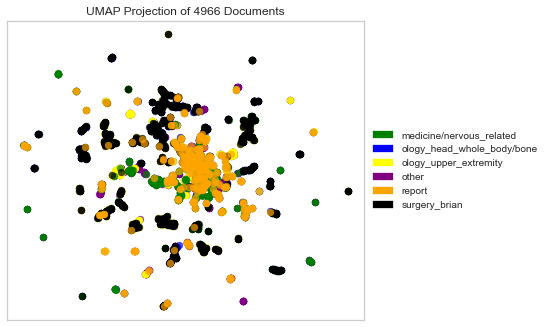

<AxesSubplot:title={'center':'UMAP Projection of 4966 Documents'}>

In [8]:
#cluster neigbor visualization:

from yellowbrick.text import TSNEVisualizer,UMAPVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

def visualize(dim_reduction,encoding,corpus_data,corpus_target,labels = True,alpha=0.7,metric=None):
    if 'tfidf' in encoding.lower():
        encode  = TfidfVectorizer(tokenizer=tokenize_doc)
    docs = encode.fit_transform(corpus_data)
    if labels is True:
        labels = corpus_target
    else:
        labels = None
    if 'umap' in dim_reduction.lower():
        if metric is None:
            viz   = UMAPVisualizer(colors=['green', 'blue','yellow','purple', 'orange', 'black', 'brown', 'red'])
        else:
            viz = UMAPVisualizer(metric=metric)
    if 't-sne' in dim_reduction.lower():
        viz = TSNEVisualizer(alpha = alpha)
    viz.fit(docs,labels)
    return viz.poof()
visualize('umap','tfidf', data_b["transcription"],data_b["medical_specialty"])


In [34]:
#library for confusion matrix:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [42]:
from random import sample, randrange 
import copy
#brian2
body_b = list(data_b[data_b["medical_specialty"] == 'ology/whole_body/bone/medicine/nervous'].index.values)
upper_b = list(data_b[data_b["medical_specialty"] == 'ology_upper_extremity'].index.values)
other_b = list(data_b[data_b["medical_specialty"] == 'other'].index.values)
surgery_b = list(data_b[data_b["medical_specialty"] == 'surgery_brian'].index.values)
#patrick
specialty_p = list(data_p[data_p["medical_specialty"] == "specialty"].index.values)
treatment_p = list(data_p[data_p["medical_specialty"] == "treatment"].index.values)
diagnosis_p = list(data_p[data_p["medical_specialty"] == "diagnosis"].index.values)
surgery_p = list(data_p[data_p["medical_specialty"] == "surgery"].index.values)
#thai
g1 = list(data_t[data_t["medical_specialty"] == "group_1"].index.values)
g2 = list(data_t[data_t["medical_specialty"] == "group_2"].index.values)
g3 = list(data_t[data_t["medical_specialty"] == "group_3"].index.values)
#jasmine12
medicine_j12 = list(data_j12[data_j12["medical_specialty"] == "Medicine Diagnosis"].index.values)
other_j12 = list(data_j12[data_j12["medical_specialty"] == "other"].index.values)
internal_j12 = list(data_j12[data_j12["medical_specialty"] == "Internal Medicine"].index.values)
reports_j12 = list(data_j12[data_j12["medical_specialty"] == "Reports and Charting"].index.values)
surgery_j12 = list(data_j12[data_j12["medical_specialty"] == "surgery"].index.values)


                                        precision    recall  f1-score   support

ology/whole_body/bone/medicine/nervous    0.07030   0.39604   0.11940       101
                 ology_upper_extremity    0.16092   0.15385   0.15730        91
                                 other    0.77172   0.54571   0.63933       700
                         surgery_brian    0.77674   0.35232   0.48476       474

                              accuracy                        0.44143      1366
                             macro avg    0.44492   0.36198   0.35020      1366
                          weighted avg    0.68091   0.44143   0.51514      1366

44.143484626647144
                                        precision    recall  f1-score   support

ology/whole_body/bone/medicine/nervous    0.05272   0.48387   0.09509        62
                 ology_upper_extremity    0.14943   0.18310   0.16456        71
                                 other    0.81616   0.55571   0.66121       727
                 

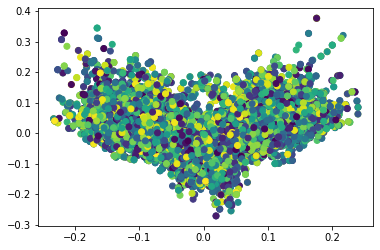

In [44]:
#brian_3
count = 0
total = 0
res = {}
for i in range(12):
    
    body_temp = copy.deepcopy(body_b)
    upper_temp = copy.deepcopy(upper_b)
    other_temp = copy.deepcopy(other_b)
    surgery_temp = copy.deepcopy(surgery_b)
  
    t1 = [body_temp.pop(randrange(len(body_temp))) for _ in range(900)] #400
    t2 = [upper_temp.pop(randrange(len(upper_temp))) for _ in range(900)] #400
    t3 = [other_temp.pop(randrange(len(other_temp))) for _ in range(900)]
    t4 = [surgery_temp.pop(randrange(len(surgery_temp))) for _ in range(900)]
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    train_index = t1+t2+t3+t4
    test_index = body_temp + upper_temp + other_temp + surgery_temp
    
    x_train, x_test = data_b['transcription'][train_index], data_b['transcription'][test_index]
    y_train, y_test = data_b['medical_specialty'][train_index], data_b['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect_b.transform(x_train).toarray()
    Test_X_Tfidf = Tfidf_vect_b.transform(x_test).toarray()
    b_lsvc = lsvc.fit(Train_X_Tfidf,y_train) 
   
    pca = PCA(n_components=2).fit(Train_X_Tfidf)
    data2D = pca.transform(Train_X_Tfidf)
    data2D2 = pca.transform(Test_X_Tfidf)
    color = np.random.RandomState(0).rand(3600)
    plt.scatter(data2D[:,0], data2D[:,1], c = color)

#     plt.show()
#     lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
#     # confusion matrix plot
#     disp = plot_confusion_matrix(b_lsvc, Test_X_Tfidf, y_test,
#                                  cmap=plt.cm.Blues,
#                                  normalize='true')
#     plt.show()
    # end of confusion matrix plot
    

    
    if count == 5:
        break

print(total/count)
print(res)

In [38]:
#thai
count = 0
total = 0
res = {}
for i in range(12):
    g1_temp = copy.deepcopy(g1)
    g2_temp = copy.deepcopy(g2)
    g3_temp = copy.deepcopy(g3)
    
    t1 = [g1_temp.pop(randrange(len(g1_temp))) for _ in range(1220)]
    t2 = [g2_temp.pop(randrange(len(g2_temp))) for _ in range(1220)]
    t3 = [g3_temp.pop(randrange(len(g3_temp))) for _ in range(1220)]

    x_train = []
    y_train = []
    x_test = []
    y_test = []
    train_index = t1+t2+t3
    test_index = g1_temp + g2_temp + g3_temp

    x_train, x_test = data_t['transcription'][train_index], data_t['transcription'][test_index]
    y_train, y_test = data_t['medical_specialty'][train_index], data_t['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect_t.transform(x_train)
    Test_X_Tfidf = Tfidf_vect_t.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
    if count == 5:
        break
    
print(total/count)
print(res)

              precision    recall  f1-score   support

     group_1    0.23926   0.65000   0.34978       120
     group_2    0.81767   0.69268   0.75000       628
     group_3    0.76786   0.61649   0.68390       558

    accuracy                        0.65620      1306
   macro avg    0.60826   0.65305   0.59456      1306
weighted avg    0.74324   0.65620   0.68498      1306

65.62021439509954
              precision    recall  f1-score   support

     group_1    0.26380   0.67188   0.37885       128
     group_2    0.80639   0.69643   0.74739       616
     group_3    0.76339   0.60854   0.67723       562

    accuracy                        0.65620      1306
   macro avg    0.61120   0.65895   0.60116      1306
weighted avg    0.73471   0.65620   0.68108      1306

65.62021439509954
              precision    recall  f1-score   support

     group_1    0.25153   0.64062   0.36123       128
     group_2    0.79699   0.68058   0.73420       623
     group_3    0.75670   0.61081   0.6

In [55]:
for k in res.keys():
    for i in res[k]:
        temp = np.array(i)
        np.set_printoptions(threshold=np.inf)
        print(temp )
        


['other' 'ology_upper_extremity' 'other' 'other' 'surgery_brian'
 'surgery_brian' 'surgery_brian' 'surgery_brian' 'surgery_brian'
 'medicine/nervous_related' 'surgery_brian' 'surgery_brian'
 'medicine/nervous_related' 'surgery_brian' 'medicine/nervous_related'
 'surgery_brian' 'surgery_brian' 'surgery_brian' 'surgery_brian'
 'surgery_brian' 'ology_head_whole_body/bone' 'surgery_brian'
 'surgery_brian' 'other' 'other' 'surgery_brian' 'other' 'other'
 'medicine/nervous_related' 'other' 'other' 'other' 'other' 'other'
 'ology_upper_extremity' 'other' 'other' 'other'
 'medicine/nervous_related' 'other' 'other' 'other' 'other'
 'ology_upper_extremity' 'other' 'other' 'medicine/nervous_related'
 'surgery_brian' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'medicine/nervous_related' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'medicine/nerv

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

newsgroups_train = fetch_20newsgroups(subset='train', 
                                      categories=['alt.atheism', 'sci.space'])
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(newsgroups_train.data).todense()
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
print(('vect', CountVectorizer()))
color = np.random.RandomState(0).rand(1073)
plt.scatter(data2D[:,0], data2D[:,1], c = color)
# plt.show()   
# print(pca)

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated
Calling BertTokenizer.from_pretrained() with the path to a single file or url is

              precision    recall  f1-score   support

   diagnosis    0.92070   0.36507   0.52283      1145
   specialty    0.10626   0.97585   0.19165       207
     surgery    0.98810   0.37172   0.54021      1563
   treatment    0.00000   0.00000   0.00000        51

    accuracy                        0.40492      2966
   macro avg    0.50376   0.42816   0.31367      2966
weighted avg    0.88355   0.40492   0.49989      2966

40.492245448415375


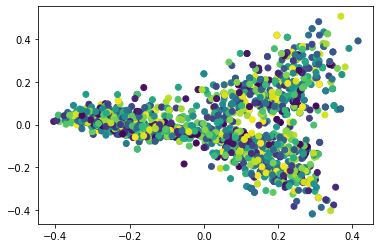

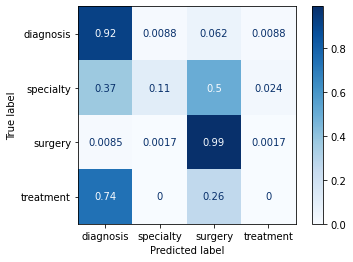

              precision    recall  f1-score   support

   diagnosis    0.92070   0.36507   0.52283      1145
   specialty    0.10626   0.97585   0.19165       207
     surgery    0.98810   0.37172   0.54021      1563
   treatment    0.00000   0.00000   0.00000        51

    accuracy                        0.40492      2966
   macro avg    0.50376   0.42816   0.31367      2966
weighted avg    0.88355   0.40492   0.49989      2966

40.492245448415375
40.492245448415375
{1: (array(['diagnosis', 'diagnosis', 'diagnosis', ..., 'surgery', 'surgery',
       'surgery'], dtype=object), array(['specialty', 'specialty', 'specialty', ..., 'surgery', 'surgery',
       'surgery'], dtype=object)), 2: (array(['diagnosis', 'diagnosis', 'diagnosis', ..., 'surgery', 'surgery',
       'surgery'], dtype=object), array(['specialty', 'specialty', 'specialty', ..., 'surgery', 'surgery',
       'surgery'], dtype=object))}


In [21]:
#patrick
count = 0
total = 0
res = {}
for i in range(12):
    
    specialty_temp = copy.deepcopy(specialty_p)
    treatment_temp = copy.deepcopy(treatment_p)
    diagnosis_temp = copy.deepcopy(diagnosis_p)
    surgery_temp = copy.deepcopy(surgery_p)
    

    t1 = [specialty_temp.pop(randrange(len(specialty_temp))) for _ in range(500)] #400
    t2 = [treatment_temp.pop(randrange(len(treatment_temp))) for _ in range(500)] #400
    t3 = [diagnosis_temp.pop(randrange(len(diagnosis_temp))) for _ in range(500)]
    t4 = [surgery_temp.pop(randrange(len(surgery_temp))) for _ in range(500)]

    x_train = []
    y_train = []
    x_test = []
    y_test = []
    train_index = t1+t2+t3+t4
    test_index = specialty_temp + treatment_temp+ diagnosis_temp+ surgery_temp
    
    x_train, x_test = data_p['transcription'][train_index], data_p['transcription'][test_index]
    y_train, y_test = data_p['medical_specialty'][train_index], data_p['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect_p.transform(x_train).toarray()
    Test_X_Tfidf = Tfidf_vect_p.transform(x_test).toarray()
    p_lsvc = lsvc.fit(Train_X_Tfidf,y_train) 
    
    
    pca = PCA(n_components=2).fit(Train_X_Tfidf)
    data2D = pca.transform(Train_X_Tfidf)
    data2D2 = pca.transform(Test_X_Tfidf)
    color = np.random.RandomState(0).rand(2000)
    plt.scatter(data2D[:,0], data2D[:,1], c = color)

#     plt.show()
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
    # confusion matrix plot
    disp = plot_confusion_matrix(p_lsvc, Test_X_Tfidf, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    plt.show()
    # end of confusion matrix plot

    
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
    if count == 2:
        break
    
print(total/count)
print(res)

[[ 0.01131369 -0.14497397]
 [-0.07576723 -0.02562133]
 [ 0.11250206 -0.02443355]
 ...
 [ 0.08889098  0.00134389]
 [ 0.07250436 -0.0224949 ]
 [ 0.03912791 -0.05049745]]
[[ 0.00277239 -0.07575969]
 [-0.00986715 -0.09831576]
 [ 0.02624101 -0.08351543]
 ...
 [ 0.04987188  0.03424145]
 [ 0.13234518  0.08177174]
 [ 0.13503013  0.12205528]]


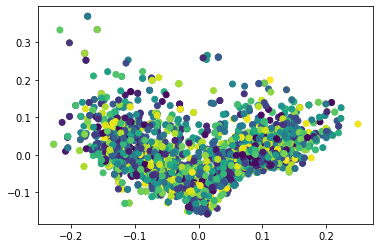

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 60241)	0.32001938184429596
  (0, 59888)	0.08105569388426431
  (0, 55217)	0.10047822079760065
  (0, 54227)	0.04995279831822482
  (0, 54035)	0.09900394814532089
  (0, 53181)	0.11772855804552211
  (0, 51576)	0.18112925018257253
  (0, 47862)	0.13015951483679636
  (0, 45758)	0.18112925018257253
  (0, 42925)	0.18112925018257253
  (0, 42924)	0.33240832427979344
  (0, 42521)	0.16288493567142637
  (0, 42490)	0.16000969092214798
  (0, 42180)	0.26168173845919435
  (0, 42133)	0.16620416213989672
  (0, 42120)	0.17012997380521902
  (0, 41514)	0.1372703945895257
  (0, 41039)	0.11269828118694225
  (0, 39278)	0.19584648994905407
  (0, 38411)	0.16000969092214798
  (0, 31210)	0.09080766023969573
  (0, 30312)	0.18112925018257253
  (0, 28160)	0.16620416213989672
  (0, 24771)	0.12703340491394952
  (0, 22667)	0.08307357680056572
  :	:
  (2499, 10076)	0.100048971714762
  (2499, 9533)	0.09397338596562729
  (2499, 8998)	0.100048971714762
  (2499, 8834)	0.1179064659296

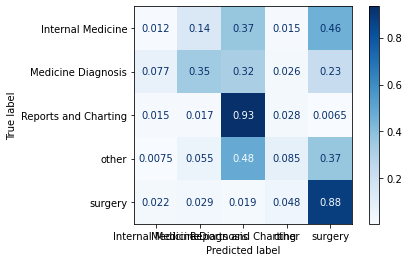

                      precision    recall  f1-score   support

   Internal Medicine    0.01175   0.27500   0.02254        40
  Medicine Diagnosis    0.34615   0.13107   0.19014       206
Reports and Charting    0.93305   0.42857   0.58736      1008
               other    0.08479   0.37363   0.13821        91
             surgery    0.88265   0.46298   0.60737      1121

            accuracy                        0.41484      2466
           macro avg    0.45168   0.33425   0.30912      2466
        weighted avg    0.81487   0.41484   0.53754      2466

41.48418491484185
41.48418491484185
{1: (array(['Medicine Diagnosis', 'Medicine Diagnosis', 'Medicine Diagnosis',
       ..., 'surgery', 'surgery', 'surgery'], dtype=object), array(['Medicine Diagnosis', 'Medicine Diagnosis', 'Medicine Diagnosis',
       ..., 'surgery', 'surgery', 'surgery'], dtype=object)), 2: (array(['Medicine Diagnosis', 'Medicine Diagnosis', 'Medicine Diagnosis',
       ..., 'surgery', 'surgery', 'surgery'], dtype=

In [24]:
#jasmine12
count = 0
total = 0
res = {}
for i in range(12):
    medicine_temp = copy.deepcopy(medicine_j12)
    other_temp = copy.deepcopy(other_j12)
    internal_temp = copy.deepcopy(internal_j12)
    reports_temp = copy.deepcopy(reports_j12)
    surgery_temp = copy.deepcopy(surgery_j12)
    
    t1 = [medicine_temp.pop(randrange(len(medicine_temp))) for _ in range(500)]
    t2 = [other_temp.pop(randrange(len(other_temp))) for _ in range(500)]
    t3 = [internal_temp.pop(randrange(len(internal_temp))) for _ in range(500)]
    t4 = [reports_temp.pop(randrange(len(reports_temp))) for _ in range(500)]
    t5 = [surgery_temp.pop(randrange(len(surgery_temp))) for _ in range(500)]
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    train_index = t1+t2+t3+t4+t5
    test_index = medicine_temp + other_temp + internal_temp + reports_temp + surgery_temp

    x_train, x_test = data_j12['transcription'][train_index], data_j12['transcription'][test_index]
    y_train, y_test = data_j12['medical_specialty'][train_index], data_j12['medical_specialty'][test_index]
    
    
    Train_X_Tfidf = Tfidf_vect_j12.transform(x_train)
    Test_X_Tfidf = Tfidf_vect_j12.transform(x_test)
    
    
    Train_X_Tfidf_arr = Train_X_Tfidf.toarray()
    Test_X_Tfidf_arr = Test_X_Tfidf.toarray()
    temp_lsvc = lsvc.fit(Train_X_Tfidf,y_train) 
    
#     graph
    pca = PCA(n_components=2).fit(Train_X_Tfidf_arr)
    data2D = pca.transform(Train_X_Tfidf_arr)
    data2D2 = pca.transform(Test_X_Tfidf_arr)
    color = np.random.RandomState(0).rand(2500)
    print(data2D)
    print(data2D2)
    plt.scatter(data2D[:,0], data2D[:,1], c = color)
    plt.show()
    print((type(Train_X_Tfidf)))
    print(Train_X_Tfidf)
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    
    # confusion matrix plot
    disp = plot_confusion_matrix(temp_lsvc, Test_X_Tfidf, y_test,
#                                  display_labels=data_b['medical_specialty'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    plt.show()
    # end of confusion matrix plot
    
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    if count == 2:
        break
    
print(total/count)
print(res)

In [21]:
#brian
count = 0
total = 0
res = {}
for i in range(12):
    nervous_temp = copy.deepcopy(nervous_b)
    upper_temp = copy.deepcopy(upper_b)
    other_temp = copy.deepcopy(other_b)
    head_temp = copy.deepcopy(head_b)
    medicin_temp = copy.deepcopy(medicine_b)
    
    surgery_temp = copy.deepcopy(surgery_b)
    bone_temp = copy.deepcopy(bone_b)
    report_temp = copy.deepcopy(report_b)
  
    
    t1 = [nervous_temp.pop(randrange(len(nervous_temp))) for _ in range(300)]
    t2 = [upper_temp.pop(randrange(len(upper_temp))) for _ in range(300)] #400
    t3 = [other_temp.pop(randrange(len(other_temp))) for _ in range(300)] #400
    t4 = [head_temp.pop(randrange(len(head_temp))) for _ in range(300)]
    t5 = [medicin_temp.pop(randrange(len(medicin_temp))) for _ in range(300)]
    t6 = [surgery_temp.pop(randrange(len(surgery_temp))) for _ in range(300)] #400
    t7 = [bone_temp.pop(randrange(len(bone_temp))) for _ in range(300)]
    t8 = [report_temp.pop(randrange(len(report_temp))) for _ in range(300)] 
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    train_index = t1+t2+t3+t4+t5+t6+t7+t8
    test_index = nervous_temp + upper_temp + other_temp+ head_temp+ medicin_temp+ surgery_temp+ bone_temp+ report_temp
    
    x_train, x_test = data_b['transcription'][train_index], data_b['transcription'][test_index]
    y_train, y_test = data_b['medical_specialty'][train_index], data_b['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect_b.transform(x_train)
    Test_X_Tfidf = Tfidf_vect_b.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

                       precision    recall  f1-score   support

                 bone    0.50000   0.16054   0.24304       299
             medicine    0.37500   0.00576   0.01134       521
      nervous_related    0.38462   0.19108   0.25532       157
ology_head_whole_body    0.22989   0.18519   0.20513       108
ology_upper_extremity    0.13974   0.39344   0.20623       244
                other    0.06928   0.44231   0.11979       104
               report    0.31298   0.19903   0.24332       206
        surgery_brian    0.60245   0.52967   0.56372       927

             accuracy                        0.30203      2566
            macro avg    0.32674   0.26338   0.23099      2566
         weighted avg    0.42648   0.30203   0.30253      2566

30.202650038971164
                       precision    recall  f1-score   support

                 bone    0.54167   0.17391   0.26329       299
             medicine    0.87500   0.01248   0.02460       561
      nervous_related    0.33333

                       precision    recall  f1-score   support

                 bone    0.52083   0.15432   0.23810       324
             medicine    0.87500   0.01215   0.02397       576
      nervous_related    0.29487   0.16912   0.21495       136
ology_head_whole_body    0.14943   0.13131   0.13978        99
ology_upper_extremity    0.13392   0.37247   0.19700       247
                other    0.04970   0.35106   0.08707        94
               report    0.22901   0.15464   0.18462       194
        surgery_brian    0.55951   0.50893   0.53302       896

             accuracy                        0.27436      2566
            macro avg    0.35153   0.23175   0.20231      2566
         weighted avg    0.51097   0.27436   0.27446      2566

27.435697583788
28.724993504806445
{1: (array(['nervous_related', 'surgery_brian', 'bone', ..., 'medicine',
       'report', 'bone'], dtype=object), array(['nervous_related', 'nervous_related', 'nervous_related', ...,
       'report', 'repor

AttributeError: 'TfidfVectorizer' object has no attribute 'feature_importances_'

In [53]:
#brian
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data_b):
    x_train = []
    y_train = []

    x_train, x_test = data_b['transcription'][train_index], data_b['transcription'][test_index]
    y_train, y_test = data_b['medical_specialty'][train_index], data_b['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

                       precision    recall  f1-score   support

                 bone    0.00000   0.00000   0.00000         0
             medicine    0.00000   0.00000   0.00000         0
      nervous_related    0.00000   0.00000   0.00000         0
ology_head_whole_body    0.00000   0.00000   0.00000         0
ology_upper_extremity    0.00000   0.00000   0.00000         0
                other    1.00000   0.02415   0.04717       414
        surgery_brian    0.00000   0.00000   0.00000         0

             accuracy                        0.02415       414
            macro avg    0.14286   0.00345   0.00674       414
         weighted avg    1.00000   0.02415   0.04717       414

2.4154589371980677
                       precision    recall  f1-score   support

ology_upper_extremity    0.00000   0.00000   0.00000     414.0
        surgery_brian    0.00000   0.00000   0.00000       0.0

             accuracy                        0.00000     414.0
            macro avg    0.0000

In [55]:
#patrick
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data_p):
    x_train = []
    y_train = []

    x_train, x_test = data_p['transcription'][train_index], data_p['transcription'][test_index]
    y_train, y_test = data_p['medical_specialty'][train_index], data_p['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

              precision    recall  f1-score   support

   specialty    1.00000   0.42271   0.59423       414
     surgery    0.00000   0.00000   0.00000         0
   treatment    0.00000   0.00000   0.00000         0

    accuracy                        0.42271       414
   macro avg    0.33333   0.14090   0.19808       414
weighted avg    1.00000   0.42271   0.59423       414

42.270531400966185
              precision    recall  f1-score   support

   specialty    0.00000   0.00000   0.00000     414.0
     surgery    0.00000   0.00000   0.00000       0.0

    accuracy                        0.00000     414.0
   macro avg    0.00000   0.00000   0.00000     414.0
weighted avg    0.00000   0.00000   0.00000     414.0

0.0
              precision    recall  f1-score   support

   specialty    0.00000   0.00000   0.00000     414.0
     surgery    0.00000   0.00000   0.00000       0.0

    accuracy                        0.00000     414.0
   macro avg    0.00000   0.00000   0.00000     414

In [57]:
#thai
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data_t):
    x_train = []
    y_train = []

    x_train, x_test = data_t['transcription'][train_index], data_t['transcription'][test_index]
    y_train, y_test = data_t['medical_specialty'][train_index], data_t['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

                                                                     precision    recall  f1-score   support

                                             bones/teeth/legs/neuro    0.50000   0.02000   0.03846        50
diseases/serious illnesses/allergy/nutrition/general/birth/children    1.00000   0.03306   0.06400       363
                                  intestine/uniary/skin/heart+blood    0.00000   0.00000   0.00000         0
                                                              notes    0.00000   0.00000   0.00000         1
                                                            surgery    0.00000   0.00000   0.00000         0

                                                           accuracy                        0.03140       414
                                                          macro avg    0.30000   0.01061   0.02049       414
                                                       weighted avg    0.93720   0.03140   0.06076       414

3.14009661835748

              precision    recall  f1-score   support

       notes    0.00000   0.00000   0.00000       0.0
     surgery    0.00000   0.00000   0.00000     413.0

    accuracy                        0.00000     413.0
   macro avg    0.00000   0.00000   0.00000     413.0
weighted avg    0.00000   0.00000   0.00000     413.0

0.0
                                                                     precision    recall  f1-score   support

                                             bones/teeth/legs/neuro    0.00000   0.00000   0.00000       0.0
diseases/serious illnesses/allergy/nutrition/general/birth/children    0.00000   0.00000   0.00000       0.0
                                  intestine/uniary/skin/heart+blood    0.00000   0.00000   0.00000       0.0
                                                              notes    0.00000   0.00000   0.00000       0.0
                                                            surgery    0.00000   0.00000   0.00000     413.0

             

In [59]:
#jasmine1 
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data_j1):
    x_train = []
    y_train = []

    x_train, x_test = data_j1['transcription'][train_index], data_j1['transcription'][test_index]
    y_train, y_test = data_j1['medical_specialty'][train_index], data_j1['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)
    
print(total/count)
print(res)

                        precision    recall  f1-score   support

             Care Type    0.00000   0.00000   0.00000         0
     Internal Medicine    1.00000   0.39614   0.56747       414
    Medicine Diagnosis    0.00000   0.00000   0.00000         0
Treatments and Surgery    0.00000   0.00000   0.00000         0
               surgery    0.00000   0.00000   0.00000         0

              accuracy                        0.39614       414
             macro avg    0.20000   0.07923   0.11349       414
          weighted avg    1.00000   0.39614   0.56747       414

39.61352657004831
                   precision    recall  f1-score   support

Internal Medicine    0.00000   0.00000   0.00000     414.0
          surgery    0.00000   0.00000   0.00000       0.0

         accuracy                        0.00000     414.0
        macro avg    0.00000   0.00000   0.00000     414.0
     weighted avg    0.00000   0.00000   0.00000     414.0

0.0
                   precision    recall  f1

In [61]:
#jasmine2
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data_j2):
    x_train = []
    y_train = []

    x_train, x_test = data_j2['transcription'][train_index], data_j2['transcription'][test_index]
    y_train, y_test = data_j2['medical_specialty'][train_index], data_j2['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
    lsvc.fit(Train_X_Tfidf,y_train) 
    
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())
    print(accuracy_score(y_test, predictions_nuSVM)*100)

print(total/count)
print(res)

              precision    recall  f1-score   support

  Category 1    0.00000   0.00000   0.00000         0
  Category 2    1.00000   0.39855   0.56995       414
  Category 4    0.00000   0.00000   0.00000         0
     surgery    0.00000   0.00000   0.00000         0

    accuracy                        0.39855       414
   macro avg    0.25000   0.09964   0.14249       414
weighted avg    1.00000   0.39855   0.56995       414

39.85507246376812
              precision    recall  f1-score   support

  Category 2    0.00000   0.00000   0.00000     414.0
     surgery    0.00000   0.00000   0.00000       0.0

    accuracy                        0.00000     414.0
   macro avg    0.00000   0.00000   0.00000     414.0
weighted avg    0.00000   0.00000   0.00000     414.0

0.0
              precision    recall  f1-score   support

  Category 2    0.00000   0.00000   0.00000     414.0
     surgery    0.00000   0.00000   0.00000       0.0

    accuracy                        0.00000     414.

In [20]:
x_train, x_test = train_data_temp['transcription'], data['transcription'][temp_list]
y_train, y_test = train_data_temp['medical_specialty'], data['medical_specialty'][temp_list]
Train_X_Tfidf = Tfidf_vect.transform(x_train)
Test_X_Tfidf = Tfidf_vect.transform(x_test)
lsvc.fit(Train_X_Tfidf,y_train)
predictions_lSVM = lsvc.predict(Test_X_Tfidf)
print(metrics.classification_report(predictions_lSVM, y_test.to_numpy(), digits=5))

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary    0.07458   0.36667   0.12394        60
    Consult - History and Phy.    0.29773   0.47985   0.36746       273
             Discharge Summary    0.87500   0.10108   0.18123       277
          ENT - Otolaryngology    0.50000   0.15873   0.24096        63
              Gastroenterology    0.60135   0.26488   0.36777       336
              General Medicine    0.32787   0.24793   0.28235       242
         Hematology - Oncology    0.35714   0.05155   0.09009        97
                    Nephrology    0.40000   0.01493   0.02878       134
                     Neurology    0.57143   0.37004   0.44920       227
                  Neurosurgery    0.94444   0.04106   0.07870       414
       Obstetrics / Gynecology    0.37975   0.32967   0.35294        91
                 Ophthalmology    0.57143   0.05882   0.10667        68
                    Orthopedic    0.47670   0.38776   0.42765  

In [17]:
count = 0
total = 0
res = {}
for train_index, test_index in kf.split(data):
    # print("TRAIN:", len(train_index), "TEST:", len(test_index))
    # for train_index, test_index in kf.split(data):
    x_train = []
    y_train = []

    x_train, x_test = data['transcription'][train_index], data['transcription'][test_index]
    y_train, y_test = data['medical_specialty'][train_index], data['medical_specialty'][test_index]

    Train_X_Tfidf = Tfidf_vect.transform(x_train)
    Test_X_Tfidf = Tfidf_vect.transform(x_test)
    
#     nsvc.fit(Train_X_Tfidf,y_train) 
    lsvc.fit(Train_X_Tfidf,y_train) 
    
#     predictions_nuSVM = nsvc.predict(Test_X_Tfidf)
    predictions_nuSVM = lsvc.predict(Test_X_Tfidf)
    
    print(metrics.classification_report(predictions_nuSVM, y_test.to_numpy(), digits=5))
    total += accuracy_score(y_test.to_numpy(), predictions_nuSVM)*100
    count += 1 
    res[count] = (predictions_nuSVM, y_test.to_numpy())


    print(accuracy_score(y_test, predictions_nuSVM)*100)
#     total += accuracy_score(y_test, predictions_nuSVM)*100
#     count += 1

# print(count)
# print(total/count)
print(total/count)
print(res)
    


                             precision    recall  f1-score   support

       Allergy / Immunology    0.00000   0.00000   0.00000         0
                 Bariatrics    0.00000   0.00000   0.00000         0
 Cardiovascular / Pulmonary    0.00000   0.00000   0.00000         0
                  Dentistry    0.00000   0.00000   0.00000         0
           General Medicine    0.00000   0.00000   0.00000         0
                  Neurology    0.00000   0.00000   0.00000         0
                    Surgery    1.00000   0.57488   0.73006       414
                    Urology    0.00000   0.00000   0.00000         0

                   accuracy                        0.57488       414
                  macro avg    0.12500   0.07186   0.09126       414
               weighted avg    1.00000   0.57488   0.73006       414

57.48792270531401
              precision    recall  f1-score   support

     Surgery    1.00000   1.00000   1.00000       414

    accuracy                        1.000

In [18]:
x_train, x_test = data['transcription'][0:5], data['transcription'][0:5]
y_train, y_test = data['medical_specialty'][0:5], data['medical_specialty'][0:5]
                                                  
Train_X_Tfidf = Tfidf_vect.transform(x_train)
Test_X_Tfidf = Tfidf_vect.transform(x_test)

nsvc.fit(Train_X_Tfidf,y_train)   
#classifier2.fit(Train_X_Tfidf,y_train)

predictions_nuSVM = nsvc.predict(Test_X_Tfidf)
print(accuracy_score(predictions_nuSVM, y_test)*100)

100.0


In [ ]:
print(len(Tfidf_vect.vocabulary_))

In [ ]:
print(Tfidf_vect.vocabulary_)

In [ ]:
print(Tfidf_vect.get_feature_names())